# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


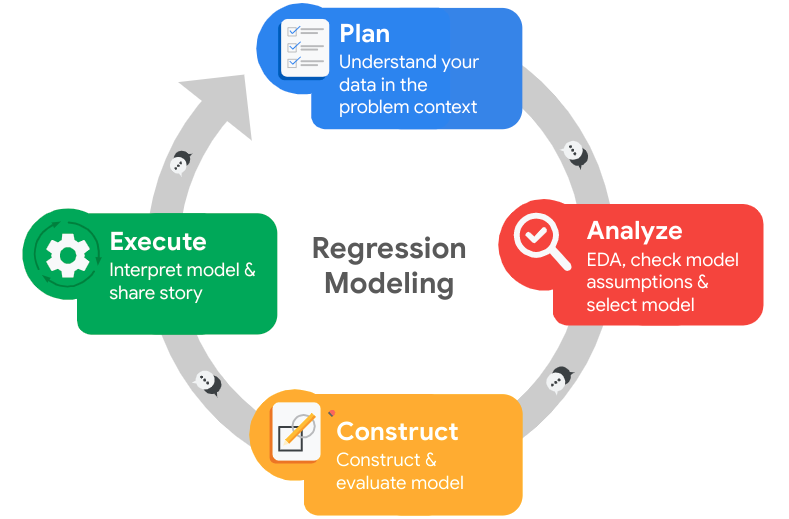

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Salifort’s senior leadership team is our stakeholder. We need to understand. How should predictions be made?
We need better understand the problem and develop a solution. A good model will help the company increase retention and job satisfaction for current employees, and save money and time training new employees.
We have a dataset called HR_capstone_dataset.csv it is data from self survey employees.The first step we will accomplish EDA.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [88]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
import datetime as dt
### YOUR CODE HERE ### 

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [89]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [90]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [91]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [92]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [93]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns = {'Work_accident':'work_accident','Department':'department'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [94]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

### Check duplicates

Check for any duplicate entries in the data.

In [95]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [96]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [97]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df = df0.drop_duplicates().reset_index(drop = True)

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

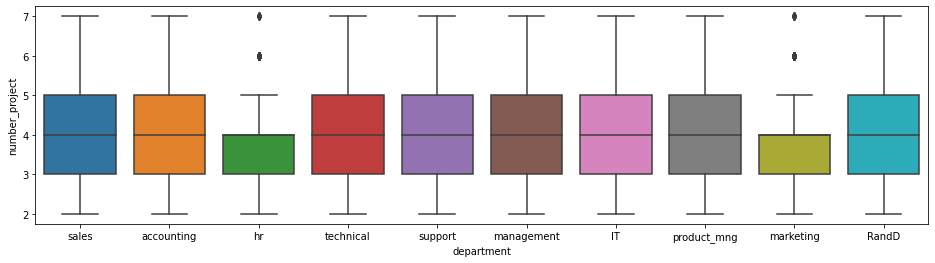

In [98]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
import seaborn as sns
plt.figure(figsize=(16,4))
sns.boxplot(data=df, x='department', y = 'number_project')
plt.show()


In [99]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
df[(df['department'].isin(['hr','marketing'])&(df['number_project'].isin([6,7])))]


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
84,0.11,0.77,6,291,4,0,1,0,marketing,low
85,0.11,0.87,6,305,4,0,1,0,marketing,low
111,0.09,0.85,6,289,4,0,1,0,hr,high
150,0.11,0.91,6,278,4,0,1,0,marketing,low
160,0.10,0.95,7,301,4,0,1,0,marketing,low
...,...,...,...,...,...,...,...,...,...,...
10455,0.24,0.70,6,153,5,1,0,0,marketing,low
11030,0.31,0.87,6,240,3,1,0,0,hr,low
11122,0.19,0.97,6,269,6,0,0,0,hr,medium
11424,0.75,0.89,6,250,2,0,0,0,marketing,medium


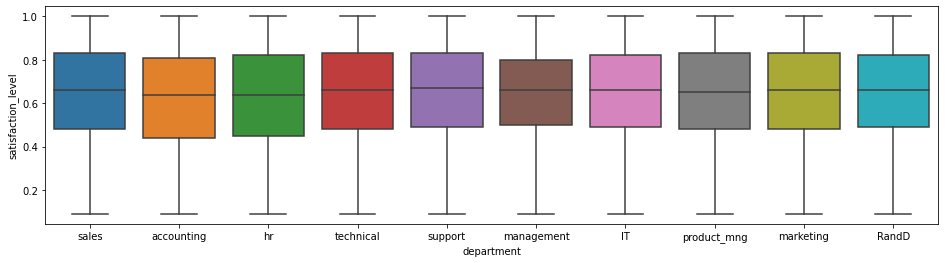

In [100]:
plt.figure(figsize=(16,4))
sns.boxplot(data=df, x='department', y = 'satisfaction_level')
plt.show()


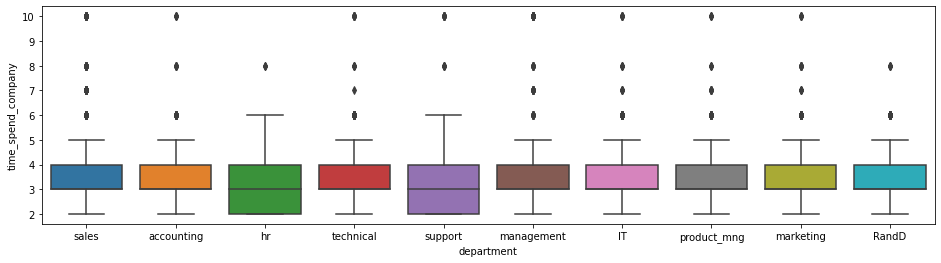

In [101]:
plt.figure(figsize=(16,4))
sns.boxplot(data=df, x='department', y = 'time_spend_company')
plt.show()

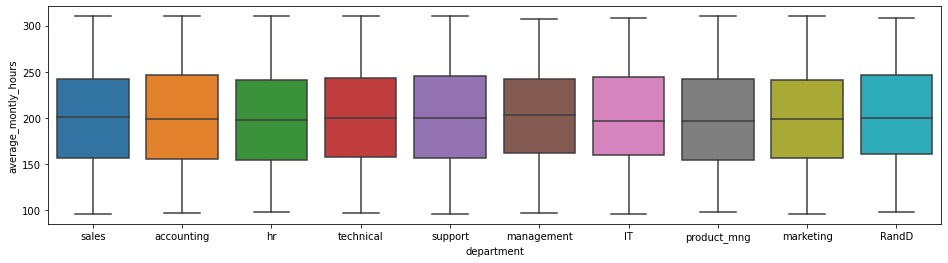

In [102]:
plt.figure(figsize=(16,4))
sns.boxplot(data=df, x='department', y = 'average_montly_hours')
plt.show()

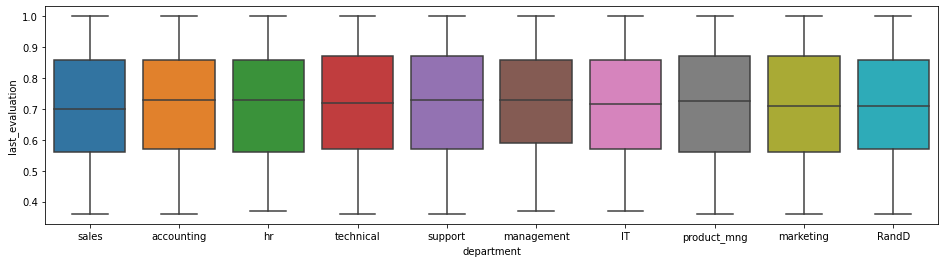

In [103]:
plt.figure(figsize=(16,4))
sns.boxplot(data=df, x='department', y = 'last_evaluation')
plt.show()

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [104]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
num_left = df['left'].sum()
num_stayed = len(df['left'])
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
percentage_left = num_left/num_stayed*100
print(f'Numbers of people who left {num_left}')
print(f'Numbers of people who stayed {num_stayed}')
print(f'Percentages of people who left {percentage_left:0.2f}%')

Numbers of people who left 1991
Numbers of people who stayed 11991
Percentages of people who left 16.60%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

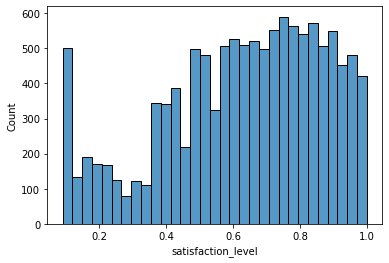

In [105]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df, x='satisfaction_level')
plt.show()

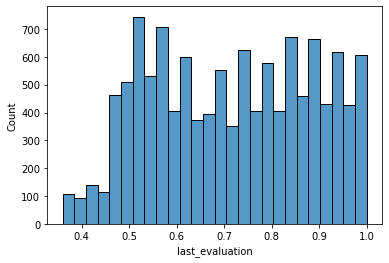

In [106]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df, x='last_evaluation')
plt.show()

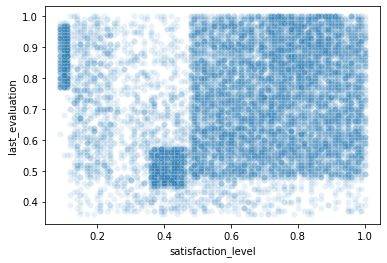

In [107]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.scatterplot(data=df, x='satisfaction_level', y='last_evaluation', alpha = 0.1)
plt.show()

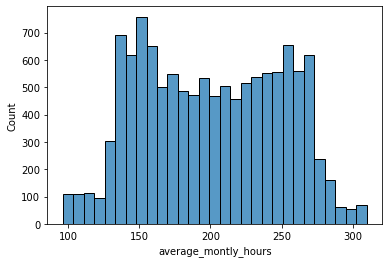

In [108]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df, x='average_montly_hours')
plt.show()

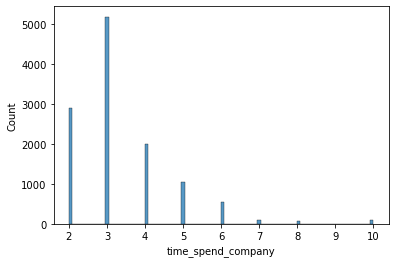

In [109]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df, x='time_spend_company')
plt.show()

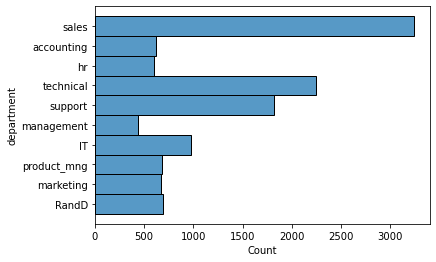

In [110]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df, y='department')
plt.show()

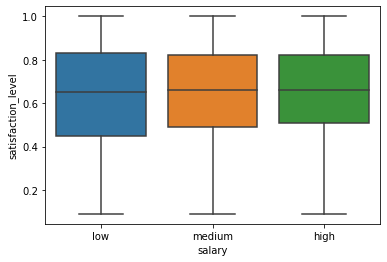

In [111]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.boxplot(data=df, x='salary',y='satisfaction_level')
plt.show()


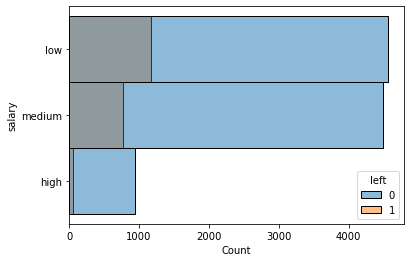

In [112]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df, y='salary',hue='left')
plt.show()

In [113]:
df[['satisfaction_level','time_spend_company','last_evaluation','average_montly_hours']].corr()

,satisfaction_level,time_spend_company,last_evaluation,average_montly_hours
satisfaction_level,1.000000,-0.152915,0.095186,-0.006252
time_spend_company,-0.152915,1.000000,0.096829,0.102875
last_evaluation,0.095186,0.096829,1.000000,0.264678
average_montly_hours,-0.006252,0.102875,0.264678,1.000000


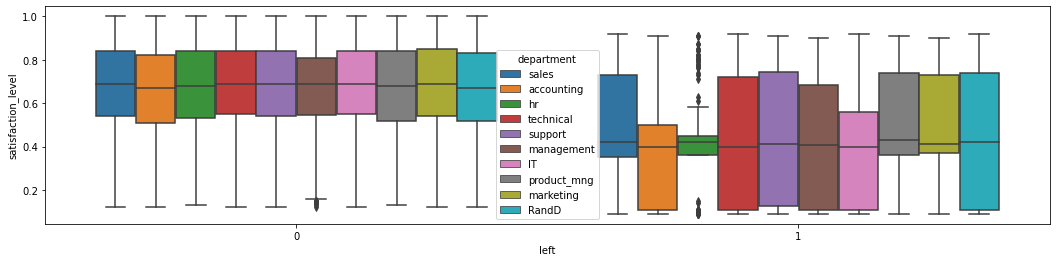

In [114]:
plt.figure(figsize=(18,4))
sns.boxplot(data=df, x='left', y='satisfaction_level',hue='department')
plt.show()

We see that the level of satisfaction among those who left is much lower.

How does the percentage of those who left the company depend on the level of salary

In [115]:
left = df[df['left']==1].groupby(['salary']).count()['left']
stayed = df[df['left']==0].groupby(['salary']).count()['left']
df_left_stayed = pd.concat([left, stayed],axis=1)
df_left_stayed.columns = ['left','stayed']
df_left_stayed['percent_who_left'] = df_left_stayed['left']*100/(df_left_stayed['left']+df_left_stayed['stayed'])
df_left_stayed['percent_who_stayed'] = 100 -  df_left_stayed['percent_who_left']
df_left_stayed

,left,stayed,percent_who_left,percent_who_stayed
salary,,,,
high,48,942,4.848485,95.151515
low,1174,4566,20.452962,79.547038
medium,769,4492,14.616993,85.383007


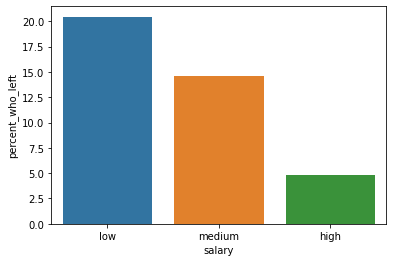

In [116]:
sns.barplot(x=df_left_stayed.index,y=df_left_stayed['percent_who_left'],order=['low','medium','high'])
plt.show()

We see that the percentage of employees who left the company is the greater the lower the salary.

Let's look at the percentage of those who left by various departments 

In [117]:
df['for_count'] = 1
df_percent_who_left_by_dep = df.pivot_table(index='department',columns='left',values='for_count',aggfunc=np.sum)
df_percent_who_left_by_dep.columns = ['stayed','left']
df_percent_who_left_by_dep['percent_who_left'] = df_percent_who_left_by_dep['left']*100/(df_percent_who_left_by_dep['left']+df_percent_who_left_by_dep['stayed'])
df_percent_who_left_by_dep['percent_who_stayed'] = df_percent_who_left_by_dep['stayed']*100/(df_percent_who_left_by_dep['left']+df_percent_who_left_by_dep['stayed'])
df_percent_who_left_by_dep

,stayed,left,percent_who_left,percent_who_stayed
department,,,,
IT,818,158,16.188525,83.811475
RandD,609,85,12.247839,87.752161
accounting,512,109,17.552335,82.447665
hr,488,113,18.801997,81.198003
management,384,52,11.926606,88.073394
marketing,561,112,16.641902,83.358098
product_mng,576,110,16.034985,83.965015
sales,2689,550,16.980550,83.019450
support,1509,312,17.133443,82.866557


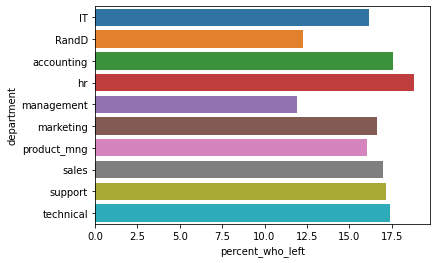

In [118]:
sns.barplot(y=df_percent_who_left_by_dep.index,x=df_percent_who_left_by_dep['percent_who_left'])
plt.show()

Let's look at the percentage of those who left by various time spent company.

In [119]:
df_percent_who_left_by_time = df.pivot_table(index='time_spend_company',columns='left',values='for_count',aggfunc=np.sum,fill_value=0)
df_percent_who_left_by_time.columns = ['left','stayed']
df_percent_who_left_by_time
df_percent_who_left_by_time['percent_who_left'] = df_percent_who_left_by_time['left']*100/(df_percent_who_left_by_time['left']+df_percent_who_left_by_time['stayed'])
df_percent_who_left_by_time['percent_who_stayed'] = df_percent_who_left_by_time['stayed']*100/(df_percent_who_left_by_time['left']+df_percent_who_left_by_time['stayed'])
df_percent_who_left_by_time

,left,stayed,percent_who_left,percent_who_stayed
time_spend_company,,,,
2,2879,31,98.934708,1.065292
3,4316,874,83.159923,16.840077
4,1510,495,75.311721,24.688279
5,580,482,54.613936,45.386064
6,433,109,79.889299,20.110701
7,94,0,100.000000,0.000000
8,81,0,100.000000,0.000000
10,107,0,100.000000,0.000000


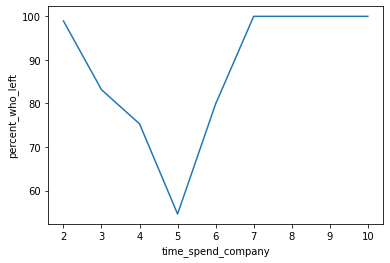

In [120]:
sns.lineplot(x=df_percent_who_left_by_time.index,y=df_percent_who_left_by_time['percent_who_left'])
plt.show()

In [121]:
df_left_by_promotion = df.pivot_table(index='left',columns='promotion_last_5years',values='for_count',aggfunc=np.sum, fill_value=0)
df_left_by_promotion.columns = ['not_promotion', 'promotion']
df_left_by_promotion

,not_promotion,promotion
left,,
0,9805,195
1,1983,8


Let's test the dependence of the number of those who left the company on promotion.

In [122]:
from scipy import stats
table = np.array([df_left_by_promotion.iloc[0,:],df_left_by_promotion.iloc[1,:]])
res = stats.chi2_contingency(table)
print(f'p-value {res[1]}')

p-value 1.6266615348676462e-06


We conducted a test and got a statistically significant result, and obviously there is a relationship between the variable "left" and "promotion_last_5years"

Let's test the dependence of the level of satisfaction on the level of salary.

In [123]:
A = df[df['salary']=='low']['satisfaction_level'] 
B = df[df['salary']=='medium']['satisfaction_level'] 
C = df[df['salary']=='high']['satisfaction_level'] 
res_f = stats.f_oneway(A, B, C)
res_f

F_onewayResult(statistic=5.182206107417106, pvalue=0.005628190907669673)

p-value < 0.05 it means that the level of satisfaction depends on the level of salary.

In [124]:
df_salary_by_sat_level = df.groupby('salary').mean()[['satisfaction_level']]
df_salary_by_sat_level.columns = ['mean_satisfaction_level']
df_salary_by_sat_level

,mean_satisfaction_level
salary,
high,0.643343
low,0.622655
medium,0.634723


Let's test the dependence of the number of those who left the company on accident.

In [125]:
df_left_accident = df.pivot_table(index='left', columns='work_accident',values='for_count',aggfunc=np.sum,fill_value=0)
df_left_accident.columns = ['not_accident','accident']
df_left_accident

,not_accident,accident
left,,
0,8255,1745
1,1886,105


In [126]:
tab_left_accident =np.array([df_left_accident.iloc[0,:],df_left_accident.iloc[1,:]])
res_chi_test = stats.chi2_contingency(tab_left_accident)
print(f'p-value {res_chi_test[1]}')

p-value 9.911242628423175e-43


In [127]:
res_chi_test

(187.7378344525747,
 9.911242628423175e-43,
 1,
 array([[8457.17621549, 1542.82378451],
        [1683.82378451,  307.17621549]]))

We have confirmed the relationship between accidents and leaving. Moreover, accidents happen less often among those who left the company.

Let us confirm with a t-test the relationship between accidents and the level of satisfaction.

In [128]:
C = df[df['work_accident']==0]['satisfaction_level']
D = df[df['work_accident']==1]['satisfaction_level']
ftest_res = stats.ttest_ind(C, D, alternative='less')
print(f'p-value {ftest_res[1]}')

p-value 6.074692242482934e-06


The average satisfaction rate among employees with accidents is higher

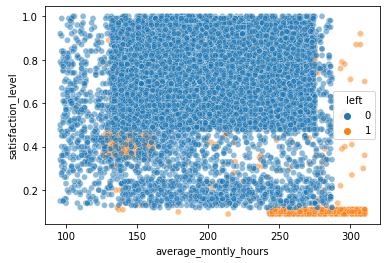

In [129]:
sns.scatterplot(data=df, x='average_montly_hours', y='satisfaction_level',hue='left',alpha=0.5)
plt.show()

In [130]:
df[['satisfaction_level','average_montly_hours','number_project']].corr()

,satisfaction_level,average_montly_hours,number_project
satisfaction_level,1.000000,-0.006252,-0.133246
average_montly_hours,-0.006252,1.000000,0.331516
number_project,-0.133246,0.331516,1.000000


In [131]:
df['norm_avg_montly_hours'] = (np.max(df['average_montly_hours']) - df['average_montly_hours'])/(np.max(df['average_montly_hours']) - np.min(df['average_montly_hours']))
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,for_count,norm_avg_montly_hours
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,0.714953
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,0.224299
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,0.177570
3,0.72,0.87,5,223,5,0,1,0,sales,low,1,0.406542
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,0.705607


In [132]:
df.groupby('left').mean()['average_montly_hours']

left
0    198.94270
1    208.16223
Name: average_montly_hours, dtype: float64

Let us confirm with a t-test the relationship between who left and the mean montly work hours.

In [133]:
E = df[df['left']==0]['average_montly_hours']
F = df[df['left']==1]['average_montly_hours']
ttest_res = stats.ttest_ind(E, F, alternative='less')
print(f'p-value {ttest_res[1]}')

p-value 5.869695356432809e-15


The mean monthly work hours beetwen who left company significant more than who stayed.

### Insights

1. The percentage of employees who left the company is the greater the lower the salary.
2. The level of satisfaction among those who left is much lower.
3. Expectedly the lowest percentage of leaving the company among management
4. Unexpectedly, the highest percentage of those who left the company among HR and Accounting(requires more in-depth study)
5. Most often people leave the company in the second year of work, and least often in the 5th year of work
6. People who get promoted are less likely to leave the company. 
7. Level of satisfaction depends on the level of salary with a positive coefficient correlation.
8. Accidents happen less often among those who left the company.
9. The average satisfaction rate among employees with accidents is higher.
10. The mean monthly work hours beetwen who left company significant more than who stayed.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1.  In one side, accidents happen less often among those who left the company on the other side, the average satisfaction rate among employees with accidents is higher, but the level of satisfaction among those who left is much lower. Therefore, the employees with accident it is special group with some special features.
2.  For logistic regression, we will take the following predictors: satisfaction_level, salary, time_spend_company, last_evaluation, norm_avg_montly_hours, promotion_last_5years.
3. We will try to construct logistic regression model.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Logistic regression.

### Identify the types of models most appropriate for this task.

We will move in the following sequence:Linear logistic regression, naive Bias, random forest, XGB boost model.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [134]:
### Import necessary libraries ###
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve,accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [135]:
df.isna().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
for_count                False
norm_avg_montly_hours    False
dtype: bool

In [136]:
df['salary_num'] = df['salary'].map({'low':1,'medium':2,'high':3})
X = df.copy()
y = df[['left']]
X = X.drop(['number_project','department','for_count','average_montly_hours','salary','left'],axis=1)
X.head()

,satisfaction_level,last_evaluation,time_spend_company,work_accident,promotion_last_5years,norm_avg_montly_hours,salary_num
0,0.38,0.53,3,0,0,0.714953,1
1,0.80,0.86,6,0,0,0.224299,2
2,0.11,0.88,4,0,0,0.177570,2
3,0.72,0.87,5,0,0,0.406542,1
4,0.37,0.52,3,0,0,0.705607,1


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)

In [138]:
log_reg_model = LogisticRegression().fit(X_train, y_train)

In [139]:
log_reg_model.coef_

array([[-3.41643898,  0.21638833,  0.2821872 , -1.3519145 , -1.10930625,
        -0.37443029, -0.62554815]])

In [140]:
from statsmodels.formula.api import logit

In [141]:
#columns = ['left','satisfaction_level','last_evaluation','time_spend_company','norm_avg_montly_hours','work_accident','promotion_last_5years','salary']df_train, X = df.sample(frac = 0.7, replace=False,random_state=42)
df_train, df_test, f_train, f_test = train_test_split(df, df['left'])
ols_formula = "left ~ satisfaction_level + last_evaluation + time_spend_company + norm_avg_montly_hours + work_accident + promotion_last_5years + salary"
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8993 entries, 633 to 6071
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     8993 non-null   float64
 1   last_evaluation        8993 non-null   float64
 2   number_project         8993 non-null   int64  
 3   average_montly_hours   8993 non-null   int64  
 4   time_spend_company     8993 non-null   int64  
 5   work_accident          8993 non-null   int64  
 6   left                   8993 non-null   int64  
 7   promotion_last_5years  8993 non-null   int64  
 8   department             8993 non-null   object 
 9   salary                 8993 non-null   object 
 10  for_count              8993 non-null   int64  
 11  norm_avg_montly_hours  8993 non-null   float64
 12  salary_num             8993 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 983.6+ KB


In [142]:
logistic_reg_model = logit(formula = ols_formula, data = df_train)
model = logistic_reg_model.fit()
model_results = model.summary()
model_results

Optimization terminated successfully.
         Current function value: 0.365175
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                 8993
Model:                          Logit   Df Residuals:                     8984
Method:                           MLE   Df Model:                            8
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                  0.1908
Time:                        19:40:46   Log-Likelihood:                -3284.0
converged:                       True   LL-Null:                       -4058.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.9487      0.274     -7.123      0.000      -2.485      -1.413
salary[T.low]             1.9136      0.189     10.145      0.000       1.544       2.283
salary[T.medium]          1.4151      0.190      7.459      0.000       1.043       1.787
satisfaction_level       -3.5347      0.129    -27.325      0.000      -3.788      -3.281
last_evaluation           0.1147      0.198      0.580      0.562      -0.273       0.502
time_spend_company        0.2851      0.023     12.632      0.000       0.241       0.329
norm_avg_montly_hours    -0.4079      0.141     -2.894      0.004      -0.684      -0.132
work_accident            -1.4424      0.128    -11.250      0.000      -1.694      -1.191
promotion_last_5years    -1.1319      0.385     -2.937      0.003      -1.887      -0.377
=========================================================================================
"""

In [143]:
y_pred = model.predict(df_test).map(lambda x: 0 if x < 0.5 else 1)
y_pred

6153    0
4553    0
1425    0
8944    0
117     1
       ..
6596    0
2430    0
8320    0
2755    0
1434    1
Length: 2998, dtype: int64

In [144]:
f_test

6153    0
4553    0
1425    1
8944    0
117     1
       ..
6596    0
2430    0
8320    0
2755    0
1434    1
Name: left, Length: 2998, dtype: int64

In [145]:
recall_score(f_test, y_pred)

0.2459016393442623

In [146]:
precision_score(f_test, y_pred)

0.5240174672489083

In [147]:
accuracy_score(f_test, y_pred)

0.8408939292861908

In [148]:
f1_score(f_test, y_pred)

0.3347280334728034

The accuracy of our logistic regression model is relatively good, but recall, precision, and F1-score are too low.

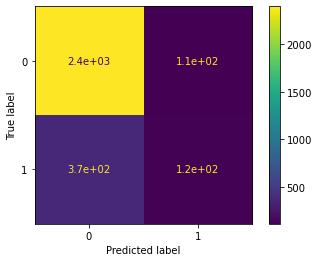

In [149]:
cm = confusion_matrix(f_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot()

Now let's build the Naive Bias model.

In [150]:
from sklearn.naive_bayes import GaussianNB

In [151]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [152]:
y_nb_pred = nb_model.predict(X_test)
y_nb_pred

array([0, 1, 1, ..., 0, 0, 1])

In [153]:
recall_nb = recall_score(y_nb_pred, y_test)
precision_nb = precision_score(y_nb_pred, y_test)
accuracy_nb = accuracy_score(y_nb_pred, y_test)
f1_nb = f1_score(y_nb_pred, y_test)
table_score = pd.DataFrame(
         {'model': ['NB'],
          'precision': [precision_nb],
          'recall': [recall_nb],
          'F1': [f1_nb],
          'accuracy': [accuracy_nb],
         })
table_score

,model,precision,recall,F1,accuracy
0,NB,0.595477,0.512987,0.551163,0.8391


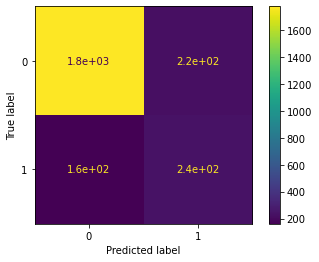

In [154]:
cm = confusion_matrix(y_test,y_nb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot()

Better but not enough

Now let's build the Random Forest model.

In [155]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,for_count,norm_avg_montly_hours,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,0.714953,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,0.224299,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,0.177570,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1,0.406542,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,0.705607,1


In [156]:
df = pd.get_dummies(df,columns=['department'])
X = df.copy()
y = X[['left']]
X = X.drop(['salary','left','norm_avg_montly_hours'],axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,for_count,salary_num,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,1,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,1,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,1,1,0,0,0,0,0,0,0,1,0,0


In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=10,stratify=y)

In [158]:
rf_model = RandomForestClassifier(random_state=11)
cv_params = {'max_depth':[50, 100, 150, 200, 250],\
             'max_features':['sqrt', 'log2'],\
             'max_samples':[0.9],\
             'min_samples_leaf':[3, 5],\
             'min_samples_split':[0.001, 0.0005],\
             'n_estimators':[50, 100, 150, 200]}
scoring = {'f1', 'recall','accuracy','precision'}
rf_cv = GridSearchCV(rf_model, cv_params, scoring=scoring, cv=5, refit='f1')

In [75]:
rf_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [159]:
import pickle 

# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [77]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [160]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [79]:
write_pickle(path, rf_cv, 'my_model_capst')

In [161]:
rf_cv_model = read_pickle(path, 'my_model_capst')

In [162]:
rf_cv_model.best_score_

0.9416776195020358

In [163]:
rf_cv_model.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 3,
 'min_samples_split': 0.0005,
 'n_estimators': 100}

In [164]:
y_rf_cv_pred = rf_cv_model.predict(X_test)
y_rf_cv_pred

array([0, 0, 0, ..., 0, 1, 1])

In [165]:
recall_rf_cv = recall_score(y_rf_cv_pred, y_test)
precision_rf_cv = precision_score(y_rf_cv_pred, y_test)
accuracy_rf_cv = accuracy_score(y_rf_cv_pred, y_test)
f1_cv = f1_score(y_rf_cv_pred, y_test)
table_score.loc[1] = ['RandForesctCV',precision_rf_cv,recall_rf_cv,f1_cv,accuracy_rf_cv]
table_score

,model,precision,recall,F1,accuracy
0,NB,0.595477,0.512987,0.551163,0.839100
1,RandForesctCV,0.927136,0.981383,0.953488,0.984994


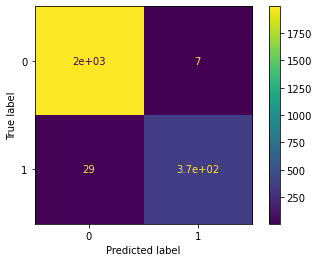

In [166]:
cm = confusion_matrix(y_test,y_rf_cv_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot()

RandomForest model gets significantly better results.

Now let's build the XGBoost model.

In [168]:
xgb = XGBClassifier(objective='binary:logistic', random_state=10)
cv_params = {'max_depth': [4, 6, 8],
              'min_child_weight': [3, 5, 7],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.5, 0.8],
              'colsample_bytree': [0.5, 0.8]
              }
scoring = {'accuracy', 'precision', 'recall', 'f1'}
xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring = scoring,
                      cv = 5,
                      refit = 'f1'
                     )

In [169]:
xgb_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     predictor=None, random_state=10,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.5, 0.8],
                         'learning_rate': [0.1, 0.2, 

In [170]:
write_pickle(path, xgb_cv, 'my_model_capst_xgb')

In [171]:
xgb_cv_model = read_pickle(path, 'my_model_capst_xgb')

In [172]:
xgb_cv_model.best_score_

0.9460996640408126

In [173]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.3,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 15,
 'subsample': 0.8}

In [174]:
y_xgb_predict = xgb_cv_model.predict(X_test)
y_xgb_predict

array([0, 0, 0, ..., 0, 1, 1])

In [175]:
recall_xgb_cv = recall_score(y_xgb_predict, y_test)
precision_xgb_cv = precision_score(y_xgb_predict, y_test)
accuracy_xgb_cv = accuracy_score(y_xgb_predict, y_test)
f1_xgb_cv = f1_score(y_xgb_predict, y_test)
table_score.loc[2] = ['XGBoostCV',precision_xgb_cv,recall_xgb_cv,f1_xgb_cv,accuracy_xgb_cv]
table_score

,model,precision,recall,F1,accuracy
0,NB,0.595477,0.512987,0.551163,0.839100
1,RandForesctCV,0.927136,0.981383,0.953488,0.984994
2,XGBoostCV,0.927136,0.971053,0.948586,0.983326


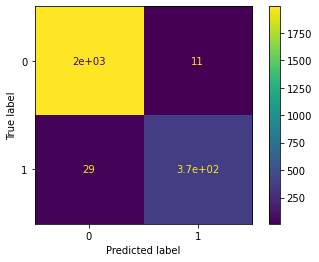

In [176]:
cm = confusion_matrix(y_test,y_xgb_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot()

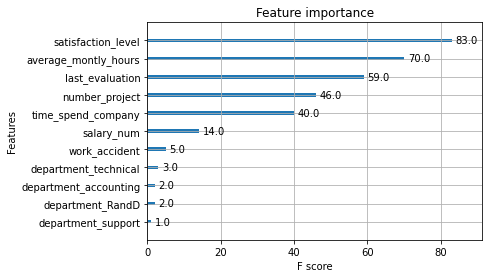

In [178]:
from xgboost import plot_importance
plot_importance(xgb_cv_model.best_estimator_)

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



The level of satisfaction significantly affects the outcome of whether a person leaves the company or not
and the level of satisfaction among those who left is much lower.
The employees who left the company is the greater the lower the salary.
Expectedly the lowest percentage of leaving the company among management
Unexpectedly, the highest percentage of those who left the company among HR and Accounting(requires more in-depth study)
Most often people leave the company in the second year of work, and least often in the 5th year of work
People who get promoted are less likely to leave the company. 
Level of satisfaction depends on the level of salary with a positive coefficient correlation.
Accidents happen less often among those who left the company.
The average satisfaction rate among employees with accidents is higher.
The mean monthly work hours beetwen who left company significant more than who stayed.


## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

XGBost is a great model with high scores.We know that satisfaction_level, last_evaluation, number_project	average_montly_hours, time_spend_company are the most important features. 

### Conclusion, Recommendations, Next Steps

It is necessary to introduce a system for monitoring the level of satisfaction and a prediction system for timely response. It is necessary to understand the reason for the high percentage of people who left in the HR department.It is important to control the average number of hours worked, as this indicator also has a significant impact.Yes, the model can be improved. We can expand the range in the list of hyperparameters. It is also necessary to save data in time and save data in dynamics. Create a dashboard for operational control. More carefully understand the reasons for leaving for the second year.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.